In [2]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
path = r'C:\Users\Nbdav\Instacart Basket Analysis'

In [4]:
ords_prods_cust = pd.read_pickle(os.path.join(path, '02 data', 'Prepared data', 'orders_products_cust.pkl'))

In [7]:
pd.set_option('display.max_columns', None)

In [8]:
ords_prods_cust.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,Busiest day,Busiest Hours,max_order,loyalty_flag,avg_spending,spending_habits,buying_freq,customer_freq,first_name,last_name,Gender,STATE,Age,date_joined,num_of_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Average_orders,10,New customer,6.367797,low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Slowest_days,Most_orders,10,New customer,6.367797,low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Slowest_days,Most_orders,10,New customer,6.367797,low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Slowest_days,Most_orders,10,New customer,6.367797,low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Slowest_days,Most_orders,10,New customer,6.367797,low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [5]:
#redoing the steps from the visualization examples.
ords_prods_cust['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [6]:
ords_prods_cust.loc[ords_prods_cust['prices'] >100, 'prices'] = np.nan

In [7]:
ords_prods_cust['prices'].describe()

count    3.239973e+07
mean     7.790994e+00
std      4.241809e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

In [8]:
ords_prods_cust.to_pickle(os.path.join(path, '02 Data','Prepared data', 'orders_products_cust.pkl'))

# Bar charts

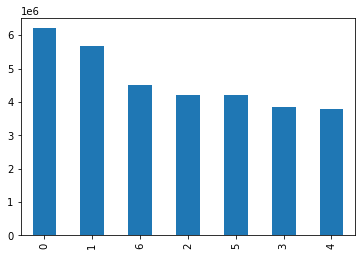

In [33]:
bar = ords_prods_cust['orders_day_of_week'].value_counts().plot.bar()

In [12]:
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow.png'))

# histograms and scatter plots

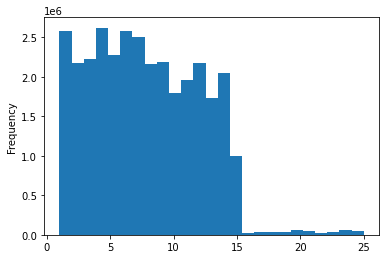

In [13]:
hist = ords_prods_cust['prices'].plot.hist(bins = 25)

In [14]:
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'prices_histogram.png'))

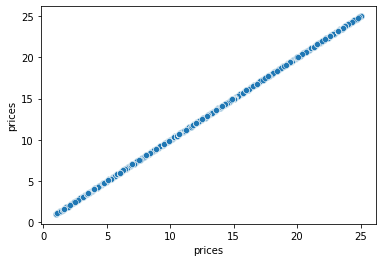

In [16]:
#scatter plot
scat = sns.scatterplot(x = 'prices', y = 'prices', data = ords_prods_cust)


In [17]:
scat.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'prices_scatter.png'))

# Sampling data line chart

In [19]:
# Setting seed for the random number generator and creating list holding True/False values to the test np.random.rand() <= 0.7

np.random.seed(4)
dev = np.random.rand(len(ords_prods_cust)) <= 0.7

In [20]:
np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [21]:
# Store 70% of sample in the big df

big = ords_prods_cust[dev]

In [23]:
# Store 30% of the sample in small df

small = ords_prods_cust[~dev]

In [24]:
# Double checking length

len(big) + len(small)

32404859

In [26]:
# Reducing sample to only necessary columns

df_2 = small[['orders_day_of_week', 'prices']]

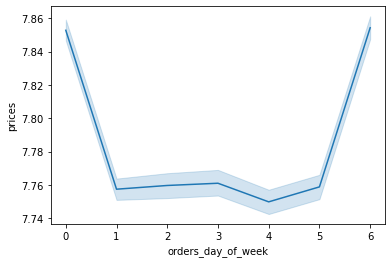

In [28]:
# Creating line chart

line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices')

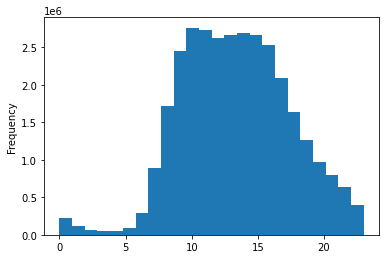

In [31]:
#create histogram using hour of the day column
hist = ords_prods_cust['order_hour_of_day'].plot.hist(bins = 24)

We have high spike of order time between the 7th and 16th hours of the day

In [45]:
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'prices_histogram_better.png'))

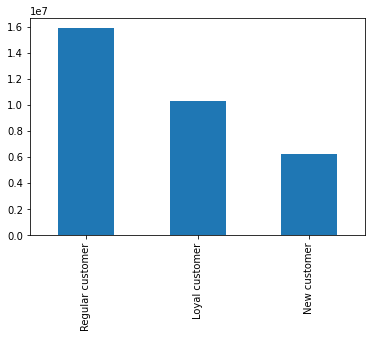

In [34]:
#create bar chart based on loyalty flags
bar = ords_prods_cust['loyalty_flag'].value_counts().plot.bar()

In [46]:
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_bar.png'))

In [36]:
#creating line graph with accurate sample
df_3 = small[['order_hour_of_day', 'prices']]

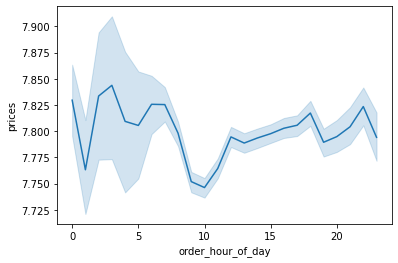

In [37]:
line_2 = sns.lineplot(data = df_3, x = 'order_hour_of_day', y = 'prices')

In [47]:
line_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'prices_hour_line.png'))

# Q6. Determine if there is a connection between age and family status

In [42]:
df_4 = small[['Age', 'num_of_dependants']]

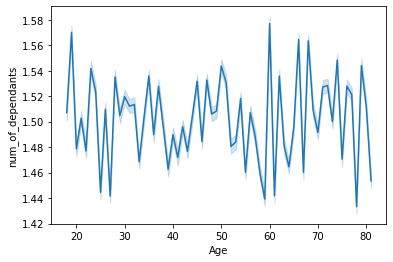

In [43]:
line_3 = sns.lineplot(data = df_4, x = 'Age', y = 'num_of_dependants')

No real relationship between the 2.

In [48]:
line_3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Age_dependants_line.png'))

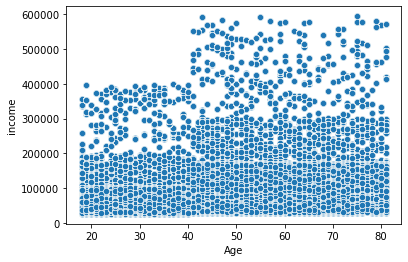

In [44]:
scat_2 = sns.scatterplot(x = 'Age', y = 'income', data = ords_prods_cust)
#creating scatterplot of age and spending power

This makes sense because older people have more time to save and earn more.

In [ ]:
scat_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'spending_power_scat.png'))